# Predict the Critical Temperature of a Superconductor
This notebook will reproduce the result of `predict_tc` in the Python language.

In [ ]:
# Install `pyCHNOSZ` if not installed already.
!pip install pyCHNOSZ

In [32]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import pyCHNOSZ
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

Since the original data for the superconducting materials list obtained from [Japan's National Institute for Materials Science (NIMS)](http://supercon.nims.go.jp/index_en.html) is no longer available, the preprocessing steps outlined cannot be reproduced.

In [48]:
training_df = pd.read_csv('../uci_supercondutor_data/train.csv')
training = np.array(training_df)
features_length = len(training[0])
X = training[:,:features_length-1]
Y = training[:,features_length-1:features_length]

print(f"Training Data Shape: {training.shape}")
print(f"Features Shape: {X.shape}")
print(f"Labels Shape: {Y.shape}")

Training Data Shape: (21263, 82)
Features Shape: (21263, 81)
Labels Shape: (21263, 1)


The first predictions will be done with random forests.

In [23]:
forest = RandomForestRegressor(2500)
forest.fit(X, Y)

/tmp/ipykernel_785/4174353784.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X, Y)


RandomForestRegressor(n_estimators=200)

25.763208178703007
[24.51041451 26.03232476 28.45699028 ...  2.2372375   2.04086
 11.97037996]


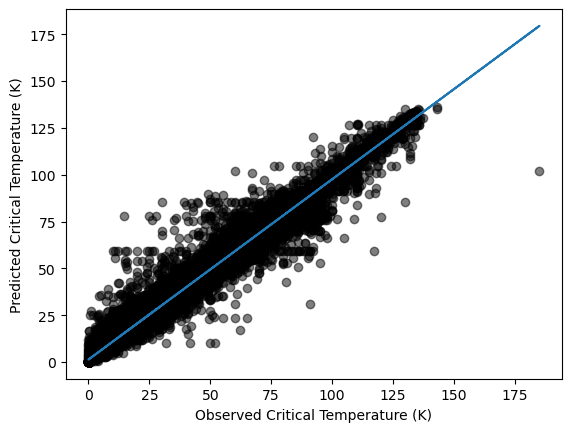

In [46]:
yfit = forest.predict(X)
print(mean_squared_error(Y, yfit))

# Plot observed temperatures vs predicted temperatures with scatter plot.
plt.scatter(Y, yfit, color=(0, 0, 0, 0.5))
plt.xlabel("Observed Critical Temperature (K)")
plt.ylabel("Predicted Critical Temperature (K)")

# Plot linear trendline
z = np.polyfit(Y.ravel(), yfit, 1)
p = np.poly1d(z)
plt.plot(Y, p(Y))

plt.show()

The next prediction will be done with xgboost.